In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras

from keras.models import load_model, Model
from keras.preprocessing import image
from PIL import Image

print("Packages Imported Successfully!")

Packages Imported Successfully!


In [2]:
classifier = load_model("BrainTumorClassifier.h5")

In [44]:
img_path = "dataset/test/Y4.jpg"

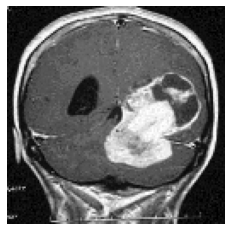

In [45]:
img = image.load_img(img_path, target_size = (128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0
plt.imshow(img_tensor[0])
plt.axis("off")
plt.show()

In [46]:
test = image.load_img(img_path, target_size = (128, 128))
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = classifier.predict(test/255.0)
flag = 0
print("\n{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("Segmentation Can't Be Done\n")
else:
    print("Displaying Clearly Segmented Image\n")
    flag = 1


100.0 % chance of Brain Tumor.
Displaying Clearly Segmented Image




Dark Region: Tumor & Skull
Light Region: Brain



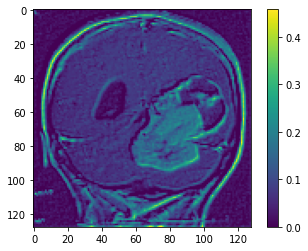

In [47]:
if flag == 1:
    layer_outputs = [layer.output for layer in classifier.layers[0:12]]
    activation_model = Model(inputs = classifier.input, outputs = layer_outputs)
    activations = activation_model.predict(img_tensor)
    first_layer_activation = activations[0]
    plt.imshow(first_layer_activation[0, :, :, 2])
    plt.colorbar()
    print("\nDark Region: Tumor & Skull")
    print("Light Region: Brain\n")
    plt.show()